In [1]:
#이상치: 정상 범위에서 크게 벗어난 값

In [11]:
import pandas as pd
df=pd.DataFrame({'sex':[1,2,1,3,2,1],
             'score':[5,4,3,4,2,6]})           #남자는 1, 여자는 2일때 3은 이상치
df                                             #1~5점까지인 점수에 6은 이상치

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [9]:
df['sex'].value_counts().sort_index()  #df.value_counts에 sort_index()하면 빈도 기준으로 내림차순 정렬하지 않고, 변수의 값 순서로 정렬

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [10]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

In [13]:
import numpy as np
df['sex']=np.where(df['sex']==3,np.nan,df['sex'])  #sex가 3이면 nan 부여
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [15]:
df['score']=np.where(df['score']>5,np.nan,df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [17]:
#결측치 제거
df.dropna(subset=['score','sex']).groupby('sex',as_index=False).agg(mean_score=('score','mean'))

,sex,mean_score
0,1.0,4.0
1,2.0,3.0


In [18]:
df=pd.DataFrame({'x1':[1,1,2,2]})
df['x2']=np.where(df['x1']==1,'a',np.nan)

In [19]:
df


,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [20]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [21]:
#이상치 제거하기
#극단치: 논리적으로 존재할 수 있지만 극단적으로 크거나 작은 값

In [22]:
mpg=pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [23]:
import seaborn as sns

<Axes: ylabel='hwy'>

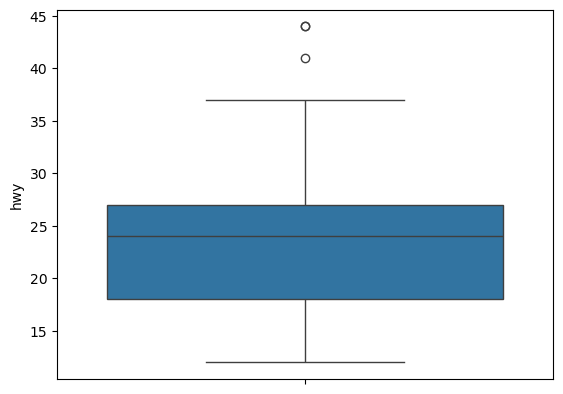

In [24]:
sns.boxplot(data=mpg,y='hwy')

In [26]:
pct25=mpg['hwy'].quantile(.25)   #하위 25%에 해당하는 1사분위수 구하기
pct25

18.0

In [27]:
pct75=mpg['hwy'].quantile(.75)   #하위 75%에 해당하는 3사분위수 구하기
pct75

27.0

In [28]:
iqr=pct75-pct25   #1사분위수와 3사분위수의 거리
iqr

9.0

In [29]:
pct25-1.5*iqr   #하한: 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값


4.5

In [30]:
pct75+1.5*iqr   #상한: 3사분위수보다 'IQR의 1.5배'만큼 더 큰 값 

40.5

In [31]:
#4.5보다 작거나 40.5보다 크면 상자 그림 기준으로 극단치


In [33]:
mpg['hwy']=np.where((mpg['hwy']<4.5)|(mpg['hwy']>40.5),np.nan,mpg['hwy'])   #4.5~40.5 벗어나면 Nan 부여
mpg['hwy'].isna().sum()   #결측치 빈도 확인

3

In [34]:
mpg.dropna(subset=['hwy']).groupby('drv',as_index=False).agg(mean_hwy=('hwy','mean'))
#hwy결측치 제거, drv별 분리, hwy의 평균 구하기

,drv,mean_hwy
0,4,19.174757
1,f,27.728155
2,r,21.000000


In [35]:
#혼자서 해보기

In [36]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [46]:
mpg.loc[[9,13,57,92],'drv']='k'  #drv에 이상치 할당

In [47]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),NaN,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),NaN,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),NaN,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),NaN,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),NaN,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),NaN,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),NaN,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),NaN,18,26.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),NaN,16,25.0,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),k,20,28.0,p,compact


In [40]:
mpg.loc[[28,42,128,202],'cty']=[3,4,39,42]   #cty에 이상치 할당
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [45]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),NaN,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),NaN,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),NaN,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),NaN,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),NaN,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),NaN,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),NaN,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),NaN,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),NaN,18,26.0,p,midsize


In [48]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),NaN,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),NaN,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),NaN,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),NaN,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),NaN,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),NaN,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),NaN,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),NaN,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),NaN,18,26.0,p,midsize


In [49]:
mpg.loc[[9,13,57,92],'drv']=='k'
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),NaN,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),NaN,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),NaN,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),NaN,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),NaN,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),NaN,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),NaN,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),NaN,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),NaN,18,26.0,p,midsize


In [51]:
mpg=pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [58]:
mpg.loc[[9,13,57,92],'drv']='k'
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [53]:
mpg.loc[[28,42,128,202],'cty']=[3,4,39,42]   #cty에 이상치 할당
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [59]:
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [60]:
mpg['drv']=np.where(mpg['drv'].isin(['4','f','r']),mpg['drv'],np.nan)
mpg['drv']

0      f
1      f
2      f
3      f
4      f
      ..
229    f
230    f
231    f
232    f
233    f
Name: drv, Length: 234, dtype: object

In [61]:
mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
r     24
Name: count, dtype: int64

In [62]:
mpg['cty'].value_counts().sort_index()

cty
3      1
4      1
9      5
11    20
12     8
13    20
14    18
15    24
16    19
17    14
18    26
19    20
20    11
21    23
22     4
23     3
24     5
25     2
26     3
28     2
29     1
33     1
35     1
39     1
42     1
Name: count, dtype: int64

<Axes: ylabel='cty'>

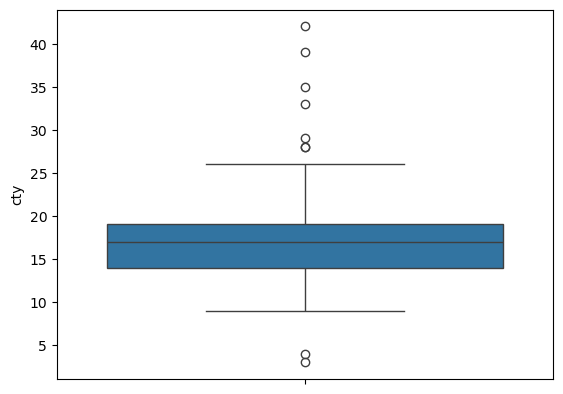

In [63]:
sns.boxplot(data=mpg,y='cty')

In [64]:
mpg25=mpg['cty'].quantile(.25)
mpg25

14.0

In [65]:
mpg75=mpg['cty'].quantile(.75)
mpg75

19.0

In [66]:
iqr=mpg75-mpg25

In [67]:
iqr

5.0

In [68]:
mpg25-1.5*iqr

6.5

In [69]:
mpg75+1.5*iqr

26.5

In [70]:
mpg['cty']=np.where((mpg['cty']<6.5)|(mpg['cty']>26.5),np.nan,mpg['cty'])

In [71]:
mpg['cty']

0      18.0
1      21.0
2      20.0
3      21.0
4      16.0
       ... 
229    19.0
230    21.0
231    16.0
232    18.0
233    17.0
Name: cty, Length: 234, dtype: float64

In [72]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             4
cty             9
hwy             0
fl              0
category        0
dtype: int64

<Axes: ylabel='cty'>

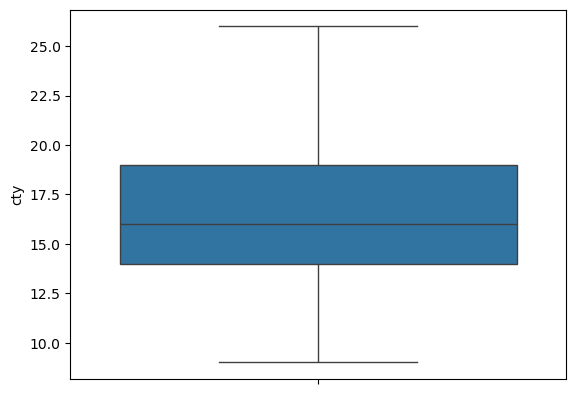

In [73]:
sns.boxplot(data=mpg,y='cty')


In [75]:
mpg.dropna(subset=['cty','drv']).groupby('drv',as_index=False).agg(cty_mean=('cty','mean'))

,drv,cty_mean
0,4,14.247423
1,f,19.470000
2,r,13.958333
